# Figure 3 - Pathways in T1D progression

### Pre-requisites

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq
import anndata as ad

import matplotlib.pyplot as plt
from matplotlib import rcParams, rcdefaults


#sc.settings.set_figure_params(dpi=80, facecolor="white")

In [2]:
# Set the font globally
rcdefaults()

### Load data

In [3]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
files   = ['s1_covet_niche_def_corr_per_fov.h5ad','s2_covet_niche_def_corr_per_fov.h5ad','s3_covet_niche_def_corr_per_fov.h5ad']

s1 = sc.read_h5ad(folder+files[0])
#s1.obs["fov"] = s1.obs["fov"].astype(str) + "_s1"
s2 = sc.read_h5ad(folder+files[1])
#s2.obs["fov"] = s2.obs["fov"].astype(str) + "_s2"
s3 = sc.read_h5ad(folder+files[2])
#s3.obs["fov"] = s3.obs["fov"].astype(str) + "_s3"

adata = ad.concat([s1, s2, s3], join='outer',uns_merge='same',axis=0,pairwise=True) 
adata

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spati

In [4]:
adata.obs_names_make_unique()

In [5]:
adata.obs['fov_unique'] = adata.obs.fov.astype(str) + '_' + adata.obs.slide.astype(str)
len(adata.obs.fov_unique.unique())

71

In [47]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [6]:
adata.X.max()

122.07407

In [7]:
genes_beta_t1 = pd.read_csv('genes_beta_t1d_recent_onset.txt', delimiter='/t', header=None)
genes_beta_t1

/tmp/ipykernel_1629496/1444596609.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  genes_beta_t1 = pd.read_csv('genes_beta_t1d_recent_onset.txt', delimiter='/t', header=None)


,0
0,CD74
1,HLA-B
2,TSHR
3,HLA-C
4,IFIT3
...,...
660,ZNF18
661,PAXIP1-AS1
662,TCEANC2
663,AC099791.2


In [8]:
overlapping_genes = set(adata.var_names).intersection(genes_beta_t1[0])

# Convert to a list if needed
overlapping_genes_list = list(overlapping_genes)
len(overlapping_genes_list)

37

In [9]:
svg = pd.read_csv('spatially_variable_genes.tsv', delimiter='\t', index_col=0)
svg

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
INS,0.654969,0.000000,2.185952e-07,0.000000,0.009901,1.854434e-06,0.000000,0.000000,0.010445
GCG,0.650099,0.000000,2.185952e-07,0.000000,0.009901,1.520245e-06,0.000000,0.000000,0.010445
TTR,0.648585,0.000000,2.185952e-07,0.000000,0.009901,1.472042e-06,0.000000,0.000000,0.010445
TYK2,0.575398,0.000000,2.185952e-07,0.000000,0.009901,1.432760e-06,0.000000,0.000000,0.010445
HSPA1A,0.532415,0.000000,2.185952e-07,0.000000,0.009901,1.271463e-06,0.000000,0.000000,0.010445
...,...,...,...,...,...,...,...,...,...
FGF13,0.000035,0.467984,2.185952e-07,0.499380,0.455446,1.532366e-07,0.467984,0.499380,0.455446
ANGPT2,-0.000044,0.464606,2.185952e-07,0.403085,0.386139,1.306586e-07,0.465081,0.403497,0.386533
NegPrb10,-0.000146,0.379610,2.185952e-07,0.291420,0.297030,1.455229e-07,0.380387,0.292916,0.297943
NegPrb14,-0.000168,0.361779,2.185952e-07,0.314978,0.316832,9.884998e-08,0.362891,0.315623,0.317480


In [10]:
svg.head(20).index

Index(['INS', 'GCG', 'TTR', 'TYK2', 'HSPA1A', 'CHGA', 'CPB1', 'PRSS2', 'MT2A',
       'REG1A', 'SERPINA3', 'IAPP', 'MALAT1', 'HLA-A', 'SOD2', 'MT1X',
       'SPINK1', 'B2M', 'CUZD1', 'SST'],
      dtype='object')

In [11]:
overlapping_genes = set(svg.head(20).index).intersection(genes_beta_t1[0])

# Convert to a list if needed
overlapping_svg_list = list(overlapping_genes)
len(overlapping_svg_list)

4

In [12]:
overlapping_svg_list

['MT1X', 'HLA-A', 'MT2A', 'B2M']

### Data Exploration

The anndata object is annotated with different levels of granularity:  
1. ``` 'cell_type_coarse' ``` obs field corresponds to the major pancreatic cell types identified only with the spatial gene panel.
2. ``` 'CellTypes_max' ``` obs field is the mapped annotation from npod dissociated data. The mapping task was performed using the optimal-transport-based tool [moscot](https://moscot.readthedocs.io/en/latest/notebooks/examples/problems/900_annotation_mapping.html).
3. ``` 'Niche_label' ``` obs field correspond to the niches identified using covet. 

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


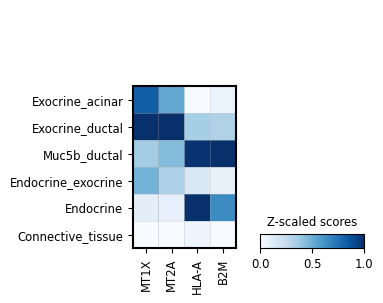

In [13]:
sc.pl.matrixplot(adata, ['MT1X', 'MT2A','HLA-A', 'B2M'], 'Niche_label', standard_scale='var',swap_axes=False,
                 colorbar_title='Z-scaled scores', cmap='Blues')

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


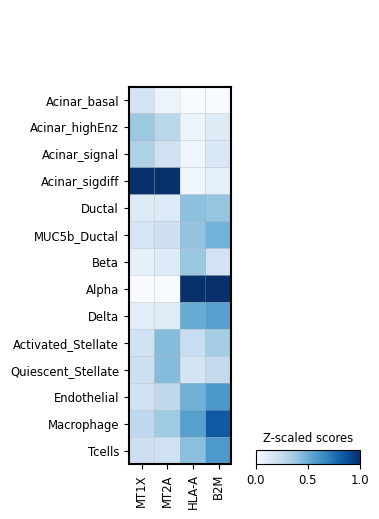

In [14]:
sc.pl.matrixplot(adata, ['MT1X', 'MT2A','HLA-A', 'B2M'], 'CellTypes_max', standard_scale='var',swap_axes=False,
                 colorbar_title='Z-scaled scores', cmap='Blues',save='beta_genes_t1d_recentonset.pdf')

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


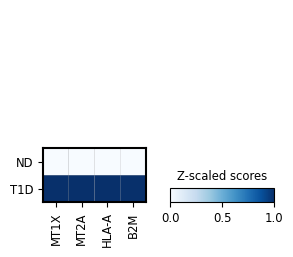

In [50]:
sc.pl.matrixplot(adata, ['MT1X', 'MT2A','HLA-A', 'B2M'], 'condition', standard_scale='var',swap_axes=False,
                 colorbar_title='Z-scaled scores', cmap='Blues')

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


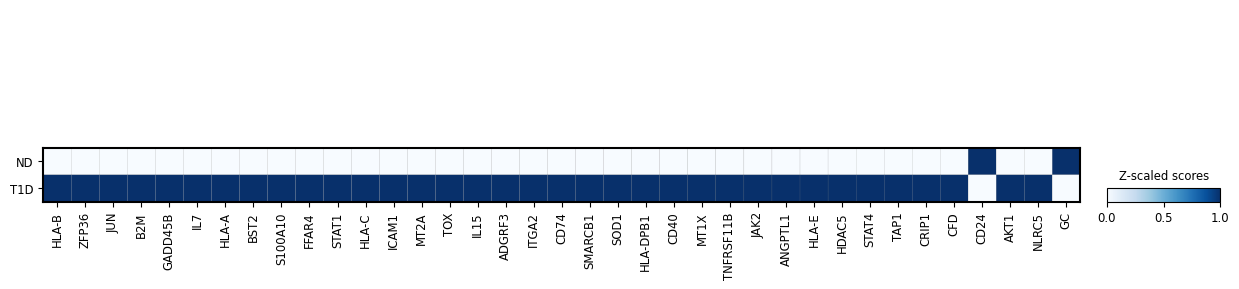

In [15]:
sc.pl.matrixplot(adata, overlapping_genes_list, 'condition', standard_scale='var',swap_axes=False,
                 colorbar_title='Z-scaled scores', cmap='Blues',save='beta_genes_percond.pdf')

In [43]:
adata.obs.CellTypes_max.cat.categories

Index(['Acinar_basal', 'Acinar_highEnz', 'Acinar_signal', 'Acinar_sigdiff',
       'Ductal', 'MUC5b_Ductal', 'Beta', 'Alpha', 'Delta',
       'Activated_Stellate', 'Quiescent_Stellate', 'Endothelial', 'Macrophage',
       'Tcells'],
      dtype='object')

In [52]:
adata.X.max()

4.7467613

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]


/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


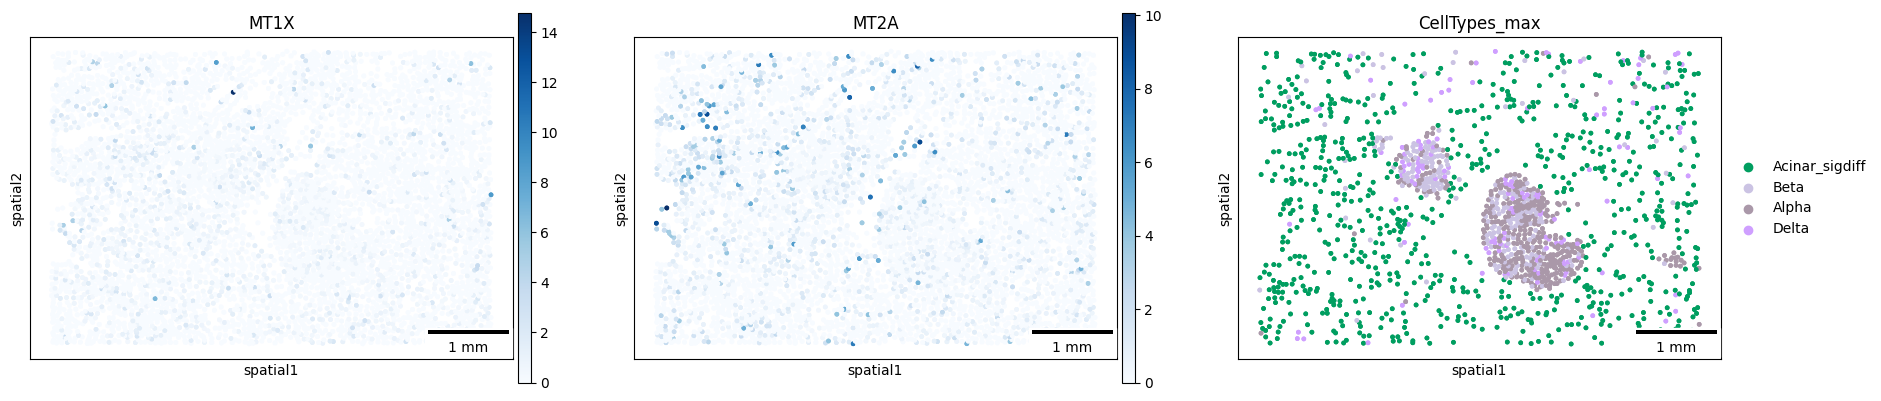

In [16]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['MT1X', 'MT2A','CellTypes_max'],
    groups = ['Acinar_sigdiff','Beta','Alpha','Delta'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='metallo_genes_nd.pdf'
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


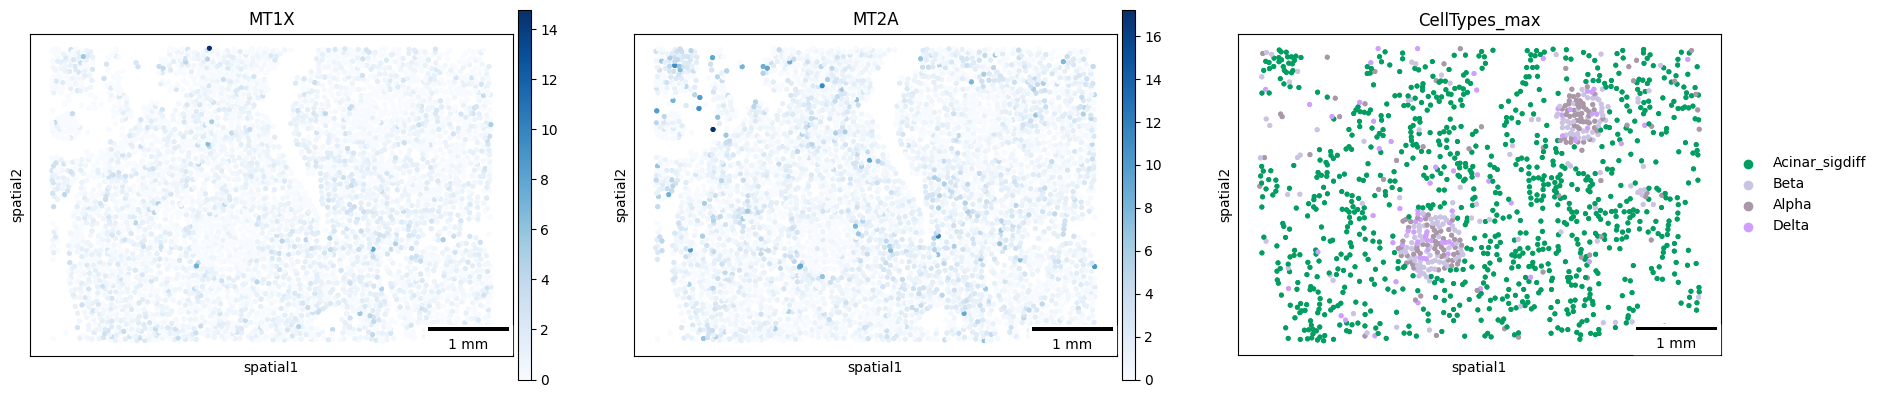

In [17]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '10_Run5211_S1'],
    color = ['MT1X', 'MT2A','CellTypes_max'],
    groups = ['Acinar_sigdiff','Beta','Alpha','Delta'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='metallo_genes_t1.pdf'
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


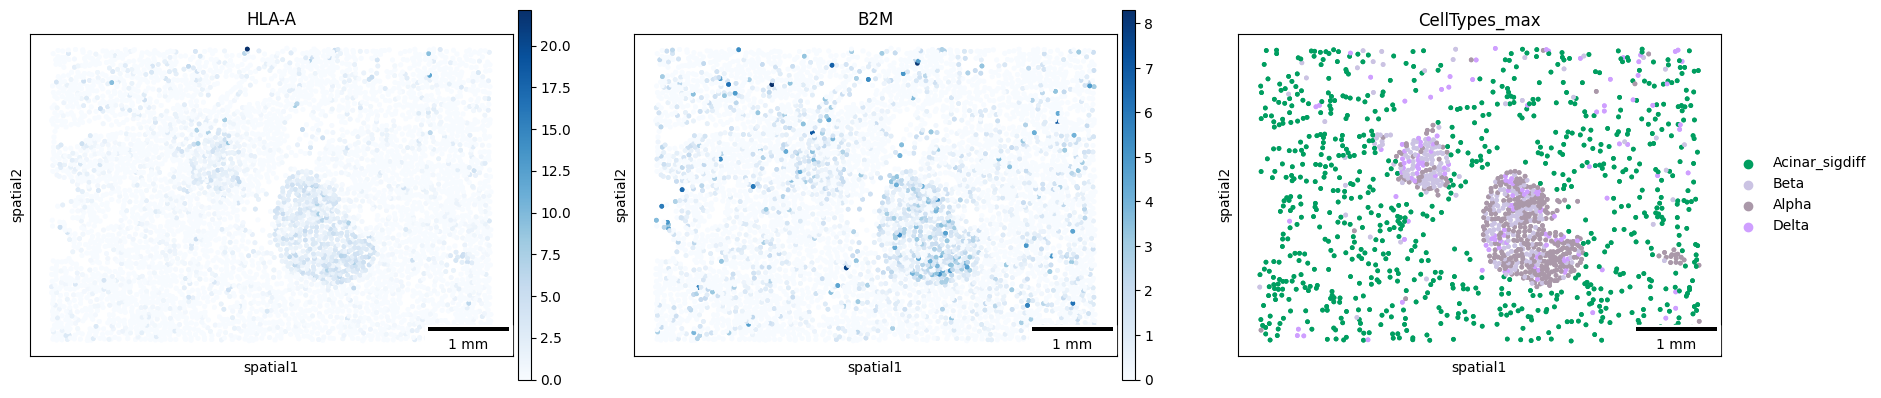

In [18]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['HLA-A', 'B2M','CellTypes_max'],
    groups = ['Beta','Alpha','Delta','Acinar_sigdiff'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='mhc_genes_nd.pdf'
)

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


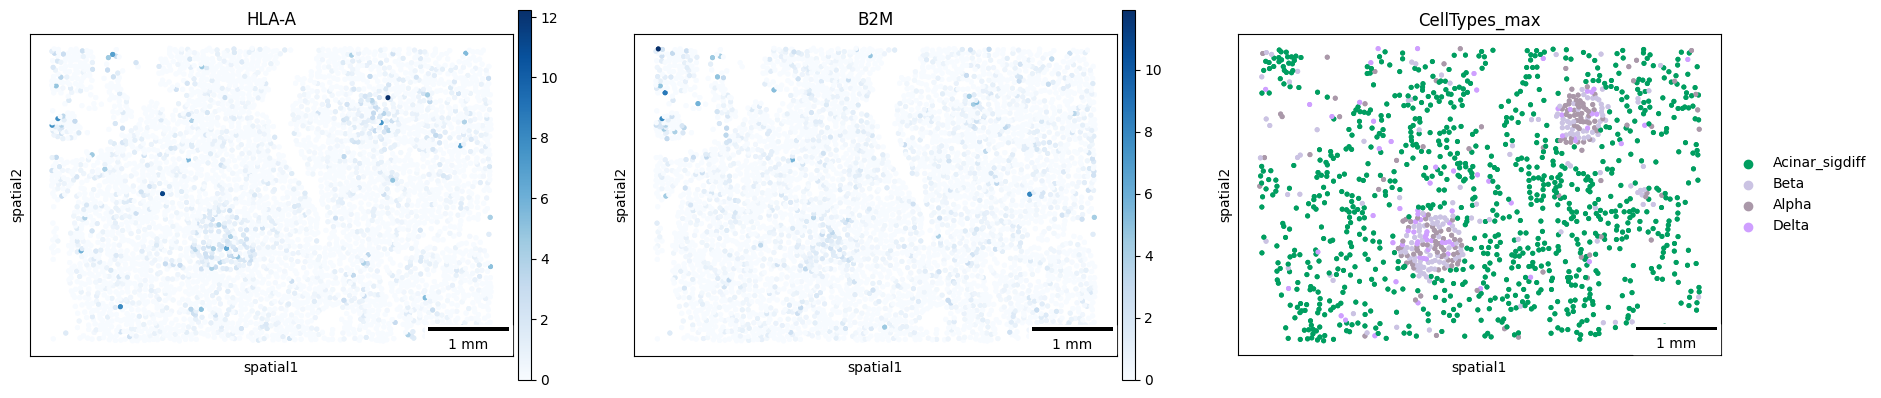

In [19]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '10_Run5211_S1'],
    color = ['HLA-A', 'B2M','CellTypes_max'],
    groups = ['Beta','Alpha','Delta','Acinar_sigdiff'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    scalebar_dx=1.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    save='mhc_genes_t1.pdf'
)